In [1]:
import pandas as pd

original_df = pd.read_excel("predikce_dataset.xlsx", engine='openpyxl')

## Data preprocessing

In [2]:
df = original_df.copy()

In [3]:
len(df)

13617

In [4]:
df.describe()

,PLAYER_ID,TARGET_GROUP_FLAG,NEW_PLAYER_FLAG,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY,COUNT_LIVE_BET
count,13617.000000,13533.000000,13617.000000,13617.000000,13617.000000,13603.000000,1.360300e+04,1.360300e+04,13617.000000,13617.000000,1.361700e+04,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.0
mean,6809.000000,0.061775,0.006169,7.543659,517.329661,740.480493,1.352653e+04,1.389962e+05,1352.498421,3950.253807,4.937002e+04,-3056.419888,1213.455122,3239.671293,6.933319,6.207755,25.0
std,3931.033643,0.240755,0.078302,7.105830,630.032124,6021.321491,7.060321e+04,6.827472e+05,1756.186651,15361.528033,2.456838e+05,19682.603316,4327.760268,11733.240877,6.933382,6.354533,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,-482200.000000,0.000000e+00,0.000000e+00,0.000000,-482200.000000,0.000000e+00,-656680.400000,0.000000,0.000000,0.000000,0.000000,25.0
25%,3405.000000,0.000000,0.000000,2.000000,113.000000,71.446875,7.383250e+02,2.178000e+03,195.000000,283.800000,1.346200e+03,-1399.000000,150.583333,200.000000,2.000000,1.000000,25.0
50%,6809.000000,0.000000,0.000000,5.000000,305.000000,226.500000,2.364682e+03,1.266500e+04,683.000000,798.600000,6.128000e+03,0.000000,380.000000,700.000000,4.000000,4.000000,25.0
75%,10213.000000,0.000000,0.000000,11.000000,690.000000,630.000000,8.019359e+03,6.915527e+04,1859.000000,2592.950000,2.607000e+04,100.000000,982.727272,2250.000000,10.000000,9.000000,25.0
max,13617.000000,1.000000,1.000000,31.000000,7808.000000,164640.000000,3.867408e+06,2.710200e+07,16934.000000,425518.000000,9.841668e+06,164640.000000,175500.000000,400000.000000,63.000000,31.000000,25.0


In [5]:
# This seems like a binary classification problem with various numerical attributes and one categorical

In [6]:
# 
# For learning drop all new player True rows and the new player column
df = df[df["NEW_PLAYER_FLAG"] == 0]
# All those were null for target, but lets drop null again just to be sure there is no noise in target
df = df[df["TARGET_GROUP_FLAG"].notnull()]

In [7]:
# The dataset is imbalanced for classes, some algortihms offer inbuilt class balancing which might be useful for this issue
df["TARGET_GROUP_FLAG"].value_counts(normalize=True)

TARGET_GROUP_FLAG
0.0    0.938225
1.0    0.061775
Name: proportion, dtype: float64

In [8]:
print("Flag 0 source counts")
print(df[df["TARGET_GROUP_FLAG"] == 0]["DATA_SOURCE_SYSTEM"].value_counts())
print("Flag 1 source counts")
print(df[df["TARGET_GROUP_FLAG"] == 1]["DATA_SOURCE_SYSTEM"].value_counts())
# Data source system is the only categorical variable here and also the only one that without further description seems to not be directly related to the user behaviour, 
# rather to some internal systems, also evenly split, and thus will not be used for predictions

Flag 0 source counts
DATA_SOURCE_SYSTEM
EXPONEA    6373
DWH        6324
Name: count, dtype: int64
Flag 1 source counts
DATA_SOURCE_SYSTEM
DWH        428
EXPONEA    408
Name: count, dtype: int64


In [9]:
nan_counts = df.isna().sum()

print("Columns with NaN values:")
print(nan_counts[nan_counts > 0])

Columns with NaN values:
AVG_DAY_GGR    14
AVG_DAY_TO     14
TOTAL_TO       14
dtype: int64


In [10]:
# 14 rows which contain missing values. Given the dataset size, the easiest approach is to just drop these 14 rows for now rather than use some method to fill them
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan

,PLAYER_ID,TARGET_GROUP_FLAG,NEW_PLAYER_FLAG,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,DATA_SOURCE_SYSTEM,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY,COUNT_LIVE_BET
8524,8525,0.0,0,6,423,NaN,NaN,NaN,925,99.50,DWH,1764.6,-329.00,47.500000,100.0,6,6,25
8525,8526,0.0,0,8,895,NaN,NaN,NaN,2617,13050.00,DWH,85435.0,-11996.12,5625.000000,16000.0,8,8,25
8526,8527,0.0,0,5,39,NaN,NaN,NaN,125,420.50,DWH,1014.0,5.00,150.000000,200.0,4,4,25
8527,8528,0.0,0,7,267,NaN,NaN,NaN,1379,1014.50,DWH,22635.0,-400.00,480.000000,750.0,5,5,25
8528,8529,0.0,0,3,67,NaN,NaN,NaN,107,450.00,EXPONEA,1270.0,200.00,325.000000,350.0,2,2,25
8529,8530,0.0,0,1,1732,NaN,NaN,NaN,1732,4226.00,DWH,38986.0,4226.00,1650.000000,2000.0,2,1,25
8530,8531,0.0,0,6,9,NaN,NaN,NaN,12,500.00,DWH,660.0,-340.00,291.000000,600.0,10,8,25
8531,8532,0.0,0,4,1148,NaN,NaN,NaN,3035,385.00,EXPONEA,14638.0,50.00,169.000000,385.0,5,4,25
8532,8533,0.0,0,2,24,NaN,NaN,NaN,27,98.40,DWH,186.0,-45.00,100.000000,100.0,1,1,25
8533,8534,0.0,0,1,241,NaN,NaN,NaN,241,919.00,EXPONEA,1547.0,919.00,200.000000,300.0,3,1,25


In [11]:
df = df.dropna()

In [12]:
len(df)

13519

In [13]:
all_cols = df.columns 

In [14]:
# Drop player ID, as it holds no information for prediction, drop data source and new player flags as discussed previously, remove target from attribute cols
dropped_cols = ["PLAYER_ID", "NEW_PLAYER_FLAG", "DATA_SOURCE_SYSTEM", "TARGET_GROUP_FLAG"]

In [15]:
attribute_cols = [x for x in all_cols if x not in dropped_cols]
attribute_cols

['COUNT_ACT_DAY',
 'AVG_DAY_BET',
 'AVG_DAY_GGR',
 'AVG_DAY_TO',
 'TOTAL_TO',
 'MAX_DAY_BET',
 'MAX_DAY_GGR',
 'MAX_DAY_TO',
 'MIN_DAY_GGR',
 'AVG_DEPOSIT',
 'MAX_DEPOSIT',
 'COUNT_ALL_DEPOSIT',
 'UNIQ_DEPOSIT_DAY',
 'COUNT_LIVE_BET']

In [16]:
correlation_cols = ['TARGET_GROUP_FLAG'] + attribute_cols

In [17]:
# Explore the other columns with correlation
corr_df = df[correlation_cols]
correlation_matrix = corr_df.corr()

In [18]:
correlation_matrix

,TARGET_GROUP_FLAG,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY,COUNT_LIVE_BET
TARGET_GROUP_FLAG,1.000000,0.272281,0.344607,0.139572,0.355669,0.462523,0.363501,0.453051,0.419369,-0.321694,0.390455,0.449442,0.283902,0.263998,NaN
COUNT_ACT_DAY,0.272281,1.000000,0.376649,-0.003788,0.073631,0.258757,0.540978,0.190438,0.171028,-0.203039,0.079700,0.166747,0.909486,0.921639,NaN
AVG_DAY_BET,0.344607,0.376649,1.000000,0.144863,0.350917,0.330793,0.879487,0.279441,0.311530,-0.157509,0.258078,0.273312,0.399209,0.367947,NaN
AVG_DAY_GGR,0.139572,-0.003788,0.144863,1.000000,0.116538,0.136411,0.097489,0.502568,0.162514,0.300669,0.353434,0.244022,0.011984,0.003535,NaN
AVG_DAY_TO,0.355669,0.073631,0.350917,0.116538,1.000000,0.679970,0.283228,0.503473,0.795269,-0.419500,0.655801,0.605093,0.083784,0.068138,NaN
TOTAL_TO,0.462523,0.258757,0.330793,0.136411,0.679970,1.000000,0.369945,0.760020,0.863261,-0.671045,0.542450,0.684808,0.252565,0.235064,NaN
MAX_DAY_BET,0.363501,0.540978,0.879487,0.097489,0.283228,0.369945,1.000000,0.306805,0.357581,-0.211324,0.209110,0.281700,0.545593,0.520786,NaN
MAX_DAY_GGR,0.453051,0.190438,0.279441,0.502568,0.503473,0.760020,0.306805,1.000000,0.718584,-0.495393,0.637488,0.771232,0.193172,0.175782,NaN
MAX_DAY_TO,0.419369,0.171028,0.311530,0.162514,0.795269,0.863261,0.357581,0.718584,1.000000,-0.602008,0.546001,0.641438,0.176805,0.160838,NaN
MIN_DAY_GGR,-0.321694,-0.203039,-0.157509,0.300669,-0.419500,-0.671045,-0.211324,-0.495393,-0.602008,1.000000,-0.327957,-0.496681,-0.192122,-0.182398,NaN


<Figure size 2000x2000 with 0 Axes>

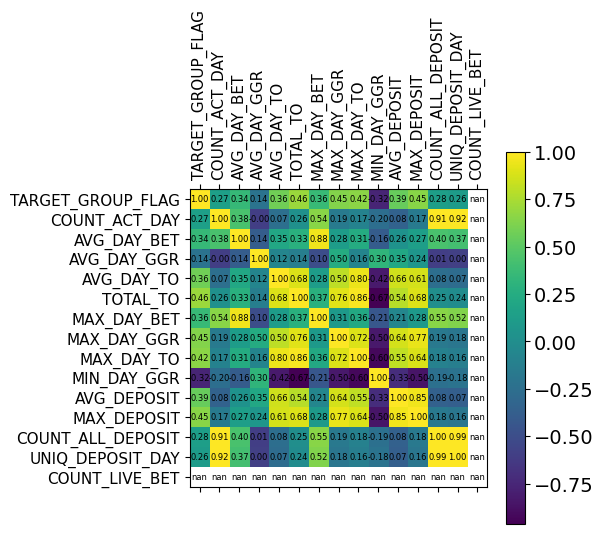

In [19]:
# Plot the correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.matshow(correlation_matrix.corr())

plt.xticks(range(correlation_matrix.select_dtypes(['number']).shape[1]), correlation_matrix.select_dtypes(['number']).columns, fontsize=11, rotation=90)
plt.yticks(range(correlation_matrix.select_dtypes(['number']).shape[1]), correlation_matrix.select_dtypes(['number']).columns, fontsize=11)
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.show()

In [20]:
# Add COUNT_LIVE_BET to dropped columns, as it holds no information for modelling and is the same for all records, rerun the same code, 
# Keep other attributes for now in selected columns df
dropped_cols = ["PLAYER_ID", "NEW_PLAYER_FLAG", "DATA_SOURCE_SYSTEM", "TARGET_GROUP_FLAG", "COUNT_LIVE_BET"]
attribute_cols = [x for x in all_cols if x not in dropped_cols]
selected_df = df[attribute_cols]
selected_df


,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY
0,8,1009,594.262500,4391.125000,35129.0,2478,2460.8,13788.0,-6.00,319.307692,1046.0,13,8
1,15,112,-157.093333,7871.533333,118073.0,550,1551.0,44485.0,-3342.00,706.666666,2000.0,15,15
2,14,412,346.371428,3102.321428,43432.5,959,1199.4,8543.5,-200.95,1266.666666,1400.0,3,3
3,1,9,98.000000,123.000000,123.0,9,98.0,123.0,98.00,100.000000,100.0,1,1
4,5,579,278.840000,2175.800000,10879.0,1281,480.1,5113.5,100.00,209.285714,350.0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13612,2,12,12.500000,112.500000,225.0,20,40.0,200.0,-15.00,0.000000,0.0,0,0
13613,7,228,63.500000,493.071428,3451.5,331,194.1,783.5,-113.20,0.000000,0.0,0,0
13614,1,31,50.000000,76.000000,76.0,31,50.0,76.0,50.00,0.000000,0.0,0,0
13615,1,20,365.000000,365.000000,365.0,20,365.0,365.0,365.00,0.000000,0.0,0,0


In [21]:
# create the y and X
y = df["TARGET_GROUP_FLAG"]
X = selected_df

In [22]:
# Split to train and test data
from sklearn.model_selection import train_test_split
seed = 12 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=seed)

In [23]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))
# Class distribution kept between train and test sets. 

TARGET_GROUP_FLAG
0.0    0.938696
1.0    0.061304
Name: proportion, dtype: float64
TARGET_GROUP_FLAG
0.0    0.936021
1.0    0.063979
Name: proportion, dtype: float64


In [24]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
rfc = RandomForestClassifier(random_state=seed, class_weight='balanced')

In [26]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [27]:
# Use RandomForestClassifier's importance to further analyze the attributes
importance_scores = rfc.feature_importances_

importance_df = pd.DataFrame({'Attribute': attribute_cols, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Attribute  Importance
4            TOTAL_TO    0.202727
6         MAX_DAY_GGR    0.126959
7          MAX_DAY_TO    0.124441
3          AVG_DAY_TO    0.123051
9         AVG_DEPOSIT    0.103875
10        MAX_DEPOSIT    0.085219
2         AVG_DAY_GGR    0.048116
8         MIN_DAY_GGR    0.045755
5         MAX_DAY_BET    0.040592
1         AVG_DAY_BET    0.034800
11  COUNT_ALL_DEPOSIT    0.023230
0       COUNT_ACT_DAY    0.021329
12   UNIQ_DEPOSIT_DAY    0.019906


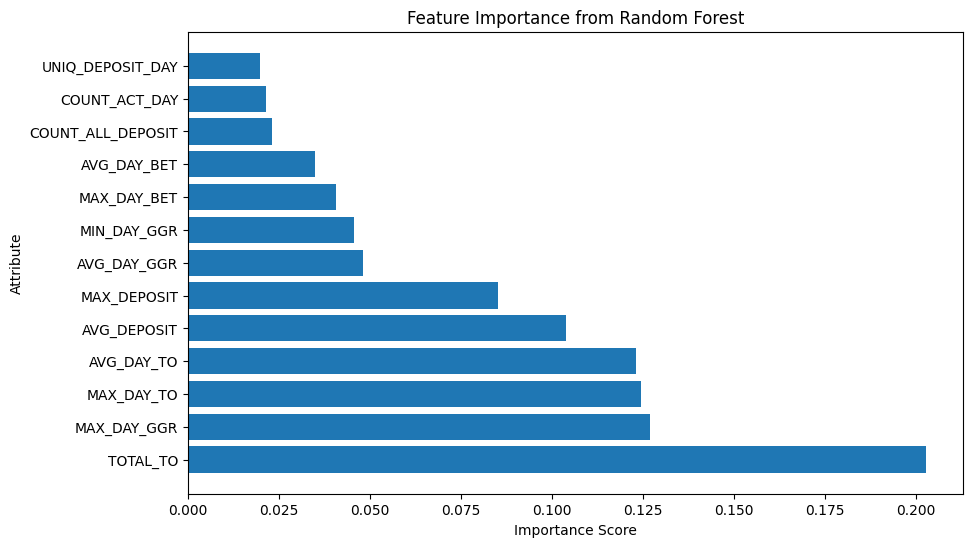

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Attribute'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Attribute')
plt.title('Feature Importance from Random Forest')
plt.show()

> This seems to agree with the correlation as the attributes with lowest correlation index are also those with lowest importance score : 
> COUNT_ACT_DAY, UNIQ_DEPOSIT_DAY, COUNT_ALL_DEPOSIT. While MIN_DAY_GGR showed very low correlation, it achieves higher importance score here.
> It would make sense to try and drop the three attributes and see how the model performance changes, 


In [29]:
# Confusion matrix and classification report for the model with all previously selected attributes
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2531
         1.0       0.73      0.51      0.60       173

    accuracy                           0.96      2704
   macro avg       0.85      0.75      0.79      2704
weighted avg       0.95      0.96      0.95      2704



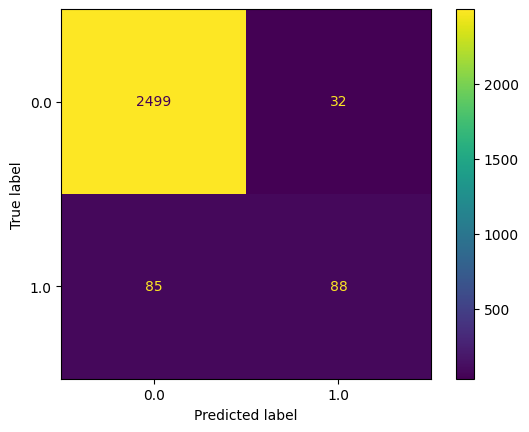

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [31]:
# Based on the importance, set threshold to 0.03 and drop the columns
threshold = 0.03
selected_attributes = importance_df[importance_df['Importance'] > threshold]['Attribute']

# Print the selected attributes and the resulting df shape
print("Selected Attributes:")
print(selected_attributes.tolist())
X_selected = df[selected_attributes]
print("Shape of the Selected df:", X_selected.shape)


Selected Attributes:
['TOTAL_TO', 'MAX_DAY_GGR', 'MAX_DAY_TO', 'AVG_DAY_TO', 'AVG_DEPOSIT', 'MAX_DEPOSIT', 'AVG_DAY_GGR', 'MIN_DAY_GGR', 'MAX_DAY_BET', 'AVG_DAY_BET']
Shape of the Selected df: (13519, 10)


In [32]:
# Try rerunning the model without the three attributes, y remains the same

X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

In [33]:
rf_selected_attributes = RandomForestClassifier(random_state=seed)
rf_selected_attributes.fit(X_train_selected, y_train)
y_pred_selected_attributes = rf_selected_attributes.predict(X_test_selected)

In [34]:
print("Classification report of original model")
print(classification_report(y_test,y_pred))

print("Classification report of model with dropped attrs")
print(classification_report(y_test,y_pred_selected_attributes))

Classification report of original model
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2531
         1.0       0.73      0.51      0.60       173

    accuracy                           0.96      2704
   macro avg       0.85      0.75      0.79      2704
weighted avg       0.95      0.96      0.95      2704

Classification report of model with dropped attrs
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2531
         1.0       0.76      0.53      0.62       173

    accuracy                           0.96      2704
   macro avg       0.87      0.76      0.80      2704
weighted avg       0.96      0.96      0.96      2704



The model with the additional columns performed very marginally better in terms of accuracy,precision, recall. While it seems like dropping these columns would achieve very slightly better performance of the model, it might also lead to a loss of information that could help the final model generalize a bit better in unseen cases. As the increase is this small, it seems not worth it to drop the columns for now, so they will be kept. This could be reevaluated later with more data if the case required it.

In [35]:
# final attributes
attribute_cols

['COUNT_ACT_DAY',
 'AVG_DAY_BET',
 'AVG_DAY_GGR',
 'AVG_DAY_TO',
 'TOTAL_TO',
 'MAX_DAY_BET',
 'MAX_DAY_GGR',
 'MAX_DAY_TO',
 'MIN_DAY_GGR',
 'AVG_DEPOSIT',
 'MAX_DEPOSIT',
 'COUNT_ALL_DEPOSIT',
 'UNIQ_DEPOSIT_DAY']

### Modelling and model Selection

In [36]:
# Let's try classifying the new players in the RFC model
# Create a df of new players only that will be used for classifications
np_df = original_df[original_df["NEW_PLAYER_FLAG"] == 1][attribute_cols]
np_df

,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY
248,1,521,694.5,5958.0,5958.0,521,694.5,5958.0,694.5,297.5,500.0,2,1
277,1,2,10.0,10.0,10.0,2,10.0,10.0,10.0,10.0,10.0,1,1
351,1,589,2798.0,22034.0,22034.0,589,2798.0,22034.0,2798.0,774.5,1000.0,2,1
691,1,177,197.3,766.0,766.0,177,197.3,766.0,197.3,100.0,100.0,1,1
876,2,93,-282.0,482.5,965.0,120,136.0,698.0,-700.0,117.5,135.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,1,307,740.0,4750.0,4750.0,307,740.0,4750.0,740.0,0.0,0.0,0,0
13504,1,466,199.4,1137.0,1137.0,466,199.4,1137.0,199.4,0.0,0.0,0,0
13511,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
13527,1,114,200.0,1415.0,1415.0,114,200.0,1415.0,200.0,0.0,0.0,0,0


In [37]:
np_preds = rfc.predict(np_df)
pd.Series(np_preds).value_counts()
# Getting no positive classifications for new players with this model. Might require hyperparameter tunning

0.0    84
Name: count, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score
rc = RandomForestClassifier(class_weight= "balanced", random_state= seed, n_estimators=8, max_depth=4)
rfc_updated = rc.fit(X_train, y_train)
rcc_np_pred = rfc_updated.predict(np_df)
print(pd.Series(rcc_np_pred).value_counts())

rfc_pred = rfc_updated.predict(X_test)
accuracy_score(y_test, rfc_pred)
# Got worse accuracy for more positive classifications, much worse precision for much higher recall

0.0    77
1.0     7
Name: count, dtype: int64


0.8883136094674556

In [39]:
print("Classification report of RFC with changed hyperparameters")
print(classification_report(y_test,rfc_pred))

Classification report of RFC with changed hyperparameters
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      2531
         1.0       0.34      0.82      0.48       173

    accuracy                           0.89      2704
   macro avg       0.67      0.86      0.71      2704
weighted avg       0.95      0.89      0.91      2704



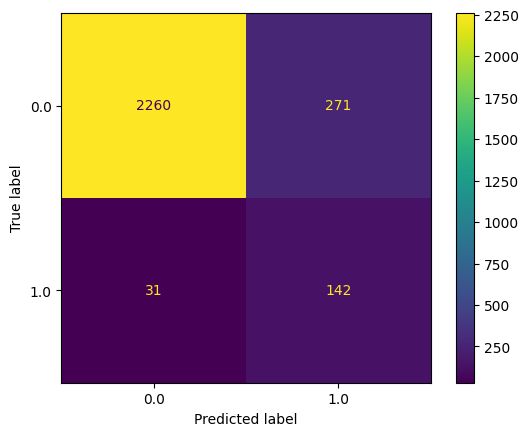

In [40]:
cm = confusion_matrix(y_test, rfc_pred, labels=rfc_updated.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_updated.classes_)
disp.plot()
plt.show()

With this hyperparameter selection, we can see that we are getting way worse precision (0.73 vs 0.34) for way better recall (0.51 vs 0.82) compared to the previous model. This leads to a much higher number of customers targetted by the campaign in total but also to a much higher number of correctly positively targetted customers (True postives) in the high recall model. 

#### Precision x Recall tradeoff discussion
Without any further knowledge about the costs of the campaign for an individual customer, costs of missing a customer that should have been included in the campaign etc it is quite difficult to know 
which parameter (evaluation metric) to optimize the model towards. Since our dataset is heavily unbalanced, accuracy as the sole metric doesnt seem to make much sense here.
While higher precision model would be useful if the costs of the campaign are very high and we need to make sure we only target the correct customers, minimize the false positives, which would be wasted cost, it would also target way fewer customers in this dataset ( high precision models classifying no or very few of the new customers as positive as seen later)

In my point of view I'd like to assume that the campaign is going to be cheap (emails maybe?) and thus it would make more sense to optimize and choose the models towards higher recall. This would likely give us more false positives, but would also ensure we don't miss that many of the customers that should  be included in the campaign.  

In [41]:
# Create a function that fits the model, measures its classification metrics and returns the value counts of its classifications on the new player set 
# A df can be made to compare the classifications of the models. (np_df_copy)
# The function returns the fitted model, its classification metrics as dictionary, the number of positively classified new players 
from sklearn.metrics import recall_score, precision_score, f1_score

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, np_df, np_df_copy):
    model.fit(X_train, y_train)

    # Measure accuracy on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_scr = f1_score(y_test, y_pred)

    classification_metrics_dict = {
        "Accuracy" : accuracy,
        "Recall" : recall,
        "Precision" : precision,
        "F1-score" : f1_scr
    }

    # Count positive classifications for new players, use simple value counts here just for quick analysis, could be improved later
    np_pred = model.predict(np_df)
    positive_counts = np_pred.sum() # binary classification, all trues are 1

    # Add model predictions to np_df_copy for later use (modifies the passed df)
    model_name = type(model).__name__
    
    np_df_copy[model_name + "_pred"] = np_pred

    return model, classification_metrics_dict, positive_counts

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Use models based on sklearn recommendations for classification
# Models list with model touples of names and instances to make things easier. Ran some manual hyparameter tuning on GBC and RFC to try and get more positive classifications out of them

models = [
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(class_weight="balanced", random_state=seed)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=seed, n_estimators=100, max_depth=10)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=seed)),
    ('RandomForestClassifier', RandomForestClassifier(class_weight="balanced", random_state=seed, n_estimators=10, max_depth=3)),
    ('MLPClassifier', MLPClassifier(random_state=seed)),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# Create a df of new players to assign each models classifications to
np_df_preds = np_df.copy()

trained_models = {}
metrics_df = pd.DataFrame(columns=['Model', 'Acc', 'Recall', 'Prec', 'F1-scr', 'NP_Pos_Classifs'])
# Loop through each model, train, and evaluate, stick with basic text output for this
for name, model in models:
    fitted_model, class_report, positive_counts = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, np_df, np_df_preds)

    print(f"{name} - Accuracy: {class_report['Accuracy']:.4f}")
    print(f"{name} - Recall: {class_report['Recall']:.4f}")
    print(f"{name} - Precision: {class_report['Precision']:.4f}")
    print(f"{name} - F1 Score: {class_report['F1-score']:.4f}")
    print(f"{name} - Positive Classifications on New Customer Data: {positive_counts}")
    metrics_df = pd.concat([metrics_df, pd.DataFrame(
        {
        'Model': name,
        'Acc': class_report['Accuracy'],
        'Recall': class_report['Recall'],
        'Prec': class_report['Precision'],
        'F1-scr': class_report['F1-score'],
        'NP_Pos_Classifs': positive_counts
        }, index=[0] )
    ])
    trained_models[name] = fitted_model


HistGradientBoostingClassifier - Accuracy: 0.9079
HistGradientBoostingClassifier - Recall: 0.7977
HistGradientBoostingClassifier - Precision: 0.3920
HistGradientBoostingClassifier - F1 Score: 0.5257
HistGradientBoostingClassifier - Positive Classifications on New Customer Data: 6.0
GradientBoostingClassifier - Accuracy: 0.9560
GradientBoostingClassifier - Recall: 0.5145
GradientBoostingClassifier - Precision: 0.7177
GradientBoostingClassifier - F1 Score: 0.5993
GradientBoostingClassifier - Positive Classifications on New Customer Data: 1.0
AdaBoostClassifier - Accuracy: 0.9575
AdaBoostClassifier - Recall: 0.5318
AdaBoostClassifier - Precision: 0.7302
AdaBoostClassifier - F1 Score: 0.6154
AdaBoostClassifier - Positive Classifications on New Customer Data: 0.0
RandomForestClassifier - Accuracy: 0.8835
RandomForestClassifier - Recall: 0.8092
RandomForestClassifier - Precision: 0.3318
RandomForestClassifier - F1 Score: 0.4706
RandomForestClassifier - Positive Classifications on New Custome

In [43]:
metrics_df

,Model,Acc,Recall,Prec,F1-scr,NP_Pos_Classifs
0,HistGradientBoostingClassifier,0.907914,0.797688,0.392045,0.525714,6.0
0,GradientBoostingClassifier,0.955991,0.514451,0.717742,0.599327,1.0
0,AdaBoostClassifier,0.957470,0.531792,0.730159,0.615385,0.0
0,RandomForestClassifier,0.883506,0.809249,0.331754,0.470588,7.0
0,MLPClassifier,0.926405,0.011561,0.066667,0.019704,8.0
0,GaussianNB,0.943417,0.630058,0.550505,0.587601,5.0
0,KNeighborsClassifier,0.957840,0.549133,0.725191,0.625000,2.0


In [44]:
# Check the preds of the ones with most positive classifications. RFC and HGBC have very similar results with GNB also agreeing on quite a few
np_df_preds[np_df_preds["RandomForestClassifier_pred"] == 1]

,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY,HistGradientBoostingClassifier_pred,GradientBoostingClassifier_pred,AdaBoostClassifier_pred,RandomForestClassifier_pred,MLPClassifier_pred,GaussianNB_pred,KNeighborsClassifier_pred
3352,2,273,3100.000,8647.500000,17295.0,476,5000.00,15770.0,1200.0,6350.000000,10700.0,2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5758,2,752,9575.000,166825.000000,333650.0,1300,10950.00,296500.0,8200.0,5000.000000,7000.0,4,2,1.0,1.0,0.0,1.0,1.0,1.0,1.0
7767,1,3321,17501.600,73269.000000,73269.0,3321,17501.60,73269.0,17501.6,12600.000000,12600.0,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8290,2,880,13900.000,122230.000000,244460.0,1462,22100.00,216710.0,5700.0,9000.000000,21000.0,3,2,1.0,0.0,0.0,1.0,1.0,1.0,0.0
8387,2,1035,733.625,159714.000000,319428.0,1422,2497.25,306274.0,-1030.0,778.000000,1148.0,6,2,1.0,0.0,0.0,1.0,1.0,1.0,1.0
10031,3,1605,529.250,93498.333333,280495.0,2812,17461.25,135635.0,-13513.5,28033.333333,40100.0,3,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0
13134,2,636,10103.000,40185.000000,80370.0,1264,20006.00,80050.0,200.0,0.000000,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
# the neural network disagrees with the others in a lot of its classifications
np_df_preds[np_df_preds["MLPClassifier_pred"] == 1]

,COUNT_ACT_DAY,AVG_DAY_BET,AVG_DAY_GGR,AVG_DAY_TO,TOTAL_TO,MAX_DAY_BET,MAX_DAY_GGR,MAX_DAY_TO,MIN_DAY_GGR,AVG_DEPOSIT,MAX_DEPOSIT,COUNT_ALL_DEPOSIT,UNIQ_DEPOSIT_DAY,HistGradientBoostingClassifier_pred,GradientBoostingClassifier_pred,AdaBoostClassifier_pred,RandomForestClassifier_pred,MLPClassifier_pred,GaussianNB_pred,KNeighborsClassifier_pred
5758,2,752,9575.000,166825.0,333650.0,1300,10950.00,296500.0,8200.0,5000.0,7000.0,4,2,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6306,1,771,-2400.000,21970.0,21970.0,771,-2400.00,21970.0,-2400.0,1800.0,3100.0,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7551,1,122,-1440.000,1920.0,1920.0,122,-1440.00,1920.0,-1440.0,500.0,500.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8290,2,880,13900.000,122230.0,244460.0,1462,22100.00,216710.0,5700.0,9000.0,21000.0,3,2,1.0,0.0,0.0,1.0,1.0,1.0,0.0
8387,2,1035,733.625,159714.0,319428.0,1422,2497.25,306274.0,-1030.0,778.0,1148.0,6,2,1.0,0.0,0.0,1.0,1.0,1.0,1.0
11654,1,1013,4160.000,40470.0,40470.0,1013,4160.00,40470.0,4160.0,2030.0,3060.0,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13247,1,21,-200.000,420.0,420.0,21,-200.00,420.0,-200.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13321,2,7,-70.000,390.0,780.0,10,-20.00,400.0,-120.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now it would be possible to make some sort of ensambling (with e.g. voting) of these models to get potentially more robust solution. But without the possibility of discussion on this topic, 
let's select one model for the purpose of this task. It'd also make sense to do further hyperparameter tunning and perhaps get even better results.

As discussed previously, due to the heavily unbalanced dataset, choosing model based just on accuracy wouldnt be the best solution in this case. 
Choosing those with high precision would not make for a very effective marketing campaign if it didnt select anyone at all or very few customers assuming the cost of the campaign is low per person. I'll assume this is not the optimal sollution, although it might be if the costs of the campaign per customer are very high. Again, this is up for business discussion, which I dont have for this example. 

The problem here is also that there are very few new player examples in the entire dataset and no true labels are given for those. This would probably require some monitoring of the deployed solution and re-engineering of the solution with more data.


From my understanding for the campaign  to make sense, it seem like the best idea to select the models with the highest recall that also keep decent F1 score (and showed at least some positive classifications). In this case that'd be the HistGradientBoosting classifier, which also agrees in all its classifications with the RandomForestClassifier and the Gaussian NB one. The voting ensamble of these three could also be considered if there was a need for a more robust solution. 


In [46]:
# compare the models with cross validation to confirm previous selection. With further hyperparameter tunning and larger datasets, this might prove to be quite costly on computational power
from sklearn.model_selection import cross_validate

cv_results = []
scoring = {'acc': 'accuracy',
           'precision': 'precision',
           'recall': 'recall', 
           'f1_score' : 'f1'}
for name, model in models:
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    
    cv_results.append((name, scores))

In [47]:
# cross validation results
cross_val_metrics_df = pd.DataFrame(columns= ["Model", "Avg Acc", "Avg Recall", "Avg Prec", "Avg F1"])

for name, scores in cv_results:
    avg_acc = scores['test_acc'].mean()
    avg_recall = scores['test_recall'].mean()
    avg_prec = scores['test_precision'].mean()
    avg_f1 = scores['test_f1_score'].mean()
    # printouts
    print(f"{name} - Average Accuracy: {avg_acc:.4f}")
    print(f"{name} - Average Recall: {avg_recall:.4f}")
    print(f"{name} - Average Precision: {avg_prec:.4f}")
    print(f"{name} - Average F1: {avg_f1:.4f}")
    # added to df for better readibility
    cross_val_metrics_df = pd.concat([cross_val_metrics_df, pd.DataFrame(
        {
        'Model': name,
        'Avg Acc': avg_acc,
        'Avg Recall': avg_recall,
        'Avg Prec': avg_prec,
        'Avg F1': avg_f1
        }, index=[0] )
    ])

HistGradientBoostingClassifier - Average Accuracy: 0.9378
HistGradientBoostingClassifier - Average Recall: 0.6833
HistGradientBoostingClassifier - Average Precision: 0.4958
HistGradientBoostingClassifier - Average F1: 0.5741
GradientBoostingClassifier - Average Accuracy: 0.9547
GradientBoostingClassifier - Average Recall: 0.4509
GradientBoostingClassifier - Average Precision: 0.7087
GradientBoostingClassifier - Average F1: 0.5491
AdaBoostClassifier - Average Accuracy: 0.9573
AdaBoostClassifier - Average Recall: 0.4841
AdaBoostClassifier - Average Precision: 0.7311
AdaBoostClassifier - Average F1: 0.5814
RandomForestClassifier - Average Accuracy: 0.8932
RandomForestClassifier - Average Recall: 0.8342
RandomForestClassifier - Average Precision: 0.3465
RandomForestClassifier - Average F1: 0.4893
MLPClassifier - Average Accuracy: 0.9010
MLPClassifier - Average Recall: 0.6924
MLPClassifier - Average Precision: 0.4021
MLPClassifier - Average F1: 0.4819
GaussianNB - Average Accuracy: 0.9455
G

In [48]:
cross_val_metrics_df

,Model,Avg Acc,Avg Recall,Avg Prec,Avg F1
0,HistGradientBoostingClassifier,0.937772,0.683288,0.495825,0.574057
0,GradientBoostingClassifier,0.954693,0.450923,0.708661,0.549109
0,AdaBoostClassifier,0.957282,0.484074,0.731100,0.581397
0,RandomForestClassifier,0.893204,0.834165,0.346487,0.489315
0,MLPClassifier,0.900971,0.692367,0.402060,0.481949
0,GaussianNB,0.945539,0.598827,0.554973,0.575308
0,KNeighborsClassifier,0.956449,0.473536,0.722887,0.571460


In [49]:
# Interesting vastly different results for each fold for the multilayerperceptron, it'd likely get better results with more hyperparameter tunning and epochal training. But that might be too time costly for the purpose of this case
cv_results[4]

('MLPClassifier',
 {'fit_time': array([0.45956612, 0.71895623, 0.71581817, 0.69462299, 0.46999907]),
  'score_time': array([0.00700092, 0.00699854, 0.00700235, 0.00600028, 0.0059998 ]),
  'test_acc': array([0.82616736, 0.94960703, 0.87748497, 0.92972723, 0.92186778]),
  'test_precision': array([0.24688797, 0.6       , 0.29754601, 0.44919786, 0.41666667]),
  'test_recall': array([0.90151515, 0.52272727, 0.72932331, 0.63157895, 0.67669173]),
  'test_f1_score': array([0.38762215, 0.55870445, 0.42265795, 0.525     , 0.51575931])})

Otherwise the cross validation confirms the selection of <b>HistGradientBoostingClassifier</b> as the best model based on the previous discussion because even though the MLPC achieves slightly higher recall, it has way worse precision and F1 scores, making the HGBC a better overall choice in this case. The RandomForestClassifier with these hyperparameters achieves quite a bit better recall, but suffers in the other metrics significantly

As we dont want to fully sacrifice precision and f1 score for recall, the HistGradientBoostingClassifier indeed seems like the best choice, still prefering recall, but not totally sacrificing other metrics

If the business problem asked for the highest recall possible, then indeed the RandomForestClassifier would be the best here

In [50]:
# get the final model for refit if needed this way
# hgbc_model = next((model_tuple for model_tuple in models if model_tuple[0] == 'HistGradientBoostingClassifier'), None)
# get the fitted model
final_model = trained_models["HistGradientBoostingClassifier"]

In [51]:
# final model classification report on original train test split
final_model = trained_models["HistGradientBoostingClassifier"]
print(classification_report(y_test, final_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2531
         1.0       0.39      0.80      0.53       173

    accuracy                           0.91      2704
   macro avg       0.69      0.86      0.74      2704
weighted avg       0.95      0.91      0.92      2704



In [52]:
# export final model as pkl file
from joblib import dump
dump(final_model, "model.pkl")

['model.pkl']